In [1]:
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../datasets/1_bias_clean.csv")
display(df.head())

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7727 entries, 0 to 7726
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7725 non-null   float64
 1   Present_Tmax      7657 non-null   float64
 2   Present_Tmin      7657 non-null   float64
 3   LDAPS_RHmin       7677 non-null   float64
 4   LDAPS_RHmax       7677 non-null   float64
 5   LDAPS_Tmax_lapse  7677 non-null   float64
 6   LDAPS_Tmin_lapse  7677 non-null   float64
 7   LDAPS_WS          7677 non-null   float64
 8   LDAPS_LH          7677 non-null   float64
 9   LDAPS_CC1         7677 non-null   float64
 10  LDAPS_CC2         7677 non-null   float64
 11  LDAPS_CC3         7677 non-null   float64
 12  LDAPS_CC4         7677 non-null   float64
 13  LDAPS_PPT1        7677 non-null   float64
 14  LDAPS_PPT2        7677 non-null   float64
 15  LDAPS_PPT3        7677 non-null   float64
 16  LDAPS_PPT4        7677 non-null   float64


In [4]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         50
LDAPS_RHmax         50
LDAPS_Tmax_lapse    50
LDAPS_Tmin_lapse    50
LDAPS_WS            50
LDAPS_LH            50
LDAPS_CC1           50
LDAPS_CC2           50
LDAPS_CC3           50
LDAPS_CC4           50
LDAPS_PPT1          50
LDAPS_PPT2          50
LDAPS_PPT3          50
LDAPS_PPT4          50
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [5]:
display(df.describe())

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7725.000000,7657.000000,7657.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7727.000000,7727.000000,7727.000000,7727.000000,7727.000000,7700.000000,7700.000000
mean,13.000000,29.769348,23.216834,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.868014,1.257050,5342.080529,30.262286,22.928987
std,7.211569,2.974493,2.413179,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279866,1.370446,429.726651,3.124653,2.490568
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4997.796875,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5437.578125,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


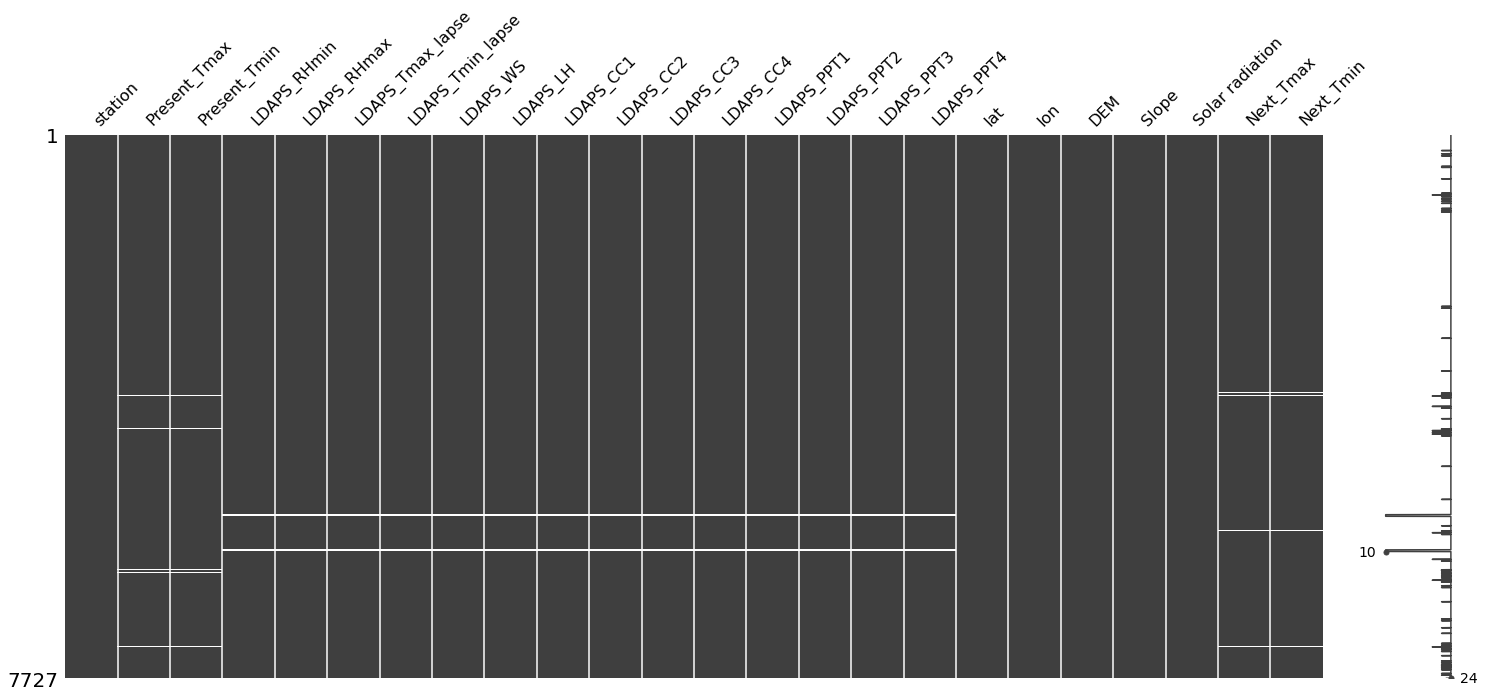

In [6]:
missingno.matrix(df)
plt.show()

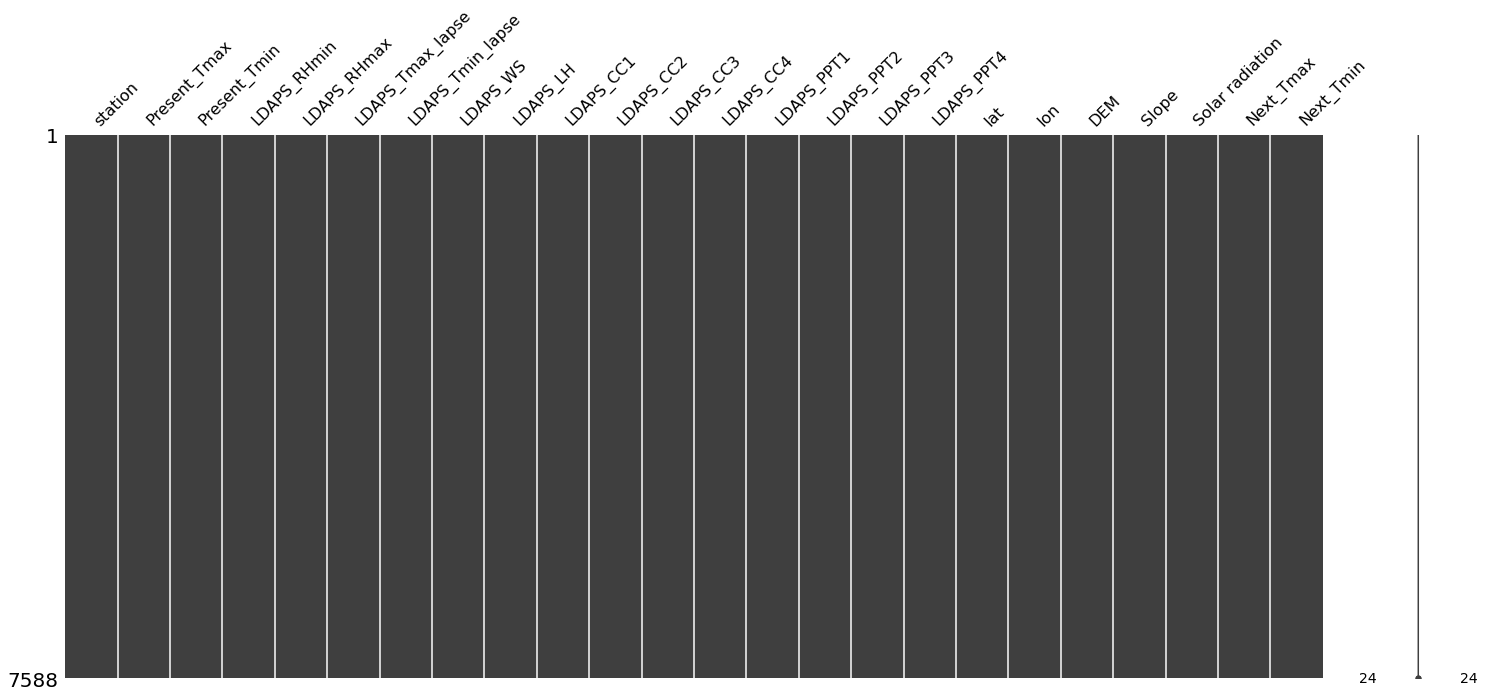

In [7]:
df_clean = df.dropna(axis=0)
missingno.matrix(df_clean)
df_null = df.copy()

In [8]:
df = df_clean
desc = df.describe()
desc.loc["std"]

station               7.217858
Present_Tmax          2.967401
Present_Tmin          2.400880
LDAPS_RHmin          14.626559
LDAPS_RHmax           7.199456
LDAPS_Tmax_lapse      2.943496
LDAPS_Tmin_lapse      2.342579
LDAPS_WS              2.177034
LDAPS_LH             33.686158
LDAPS_CC1             0.262260
LDAPS_CC2             0.257922
LDAPS_CC3             0.249833
LDAPS_CC4             0.253392
LDAPS_PPT1            1.927577
LDAPS_PPT2            1.743327
LDAPS_PPT3            1.146087
LDAPS_PPT4            1.179661
lat                   0.050428
lon                   0.079220
DEM                  54.323529
Slope                 1.372748
Solar radiation     429.782561
Next_Tmax             3.111807
Next_Tmin             2.482256
Name: std, dtype: float64

In [9]:
df_train, df_test = train_test_split(df, test_size=0.3)
df_train, df_val = train_test_split(df_train, test_size=0.1)

<AxesSubplot:>

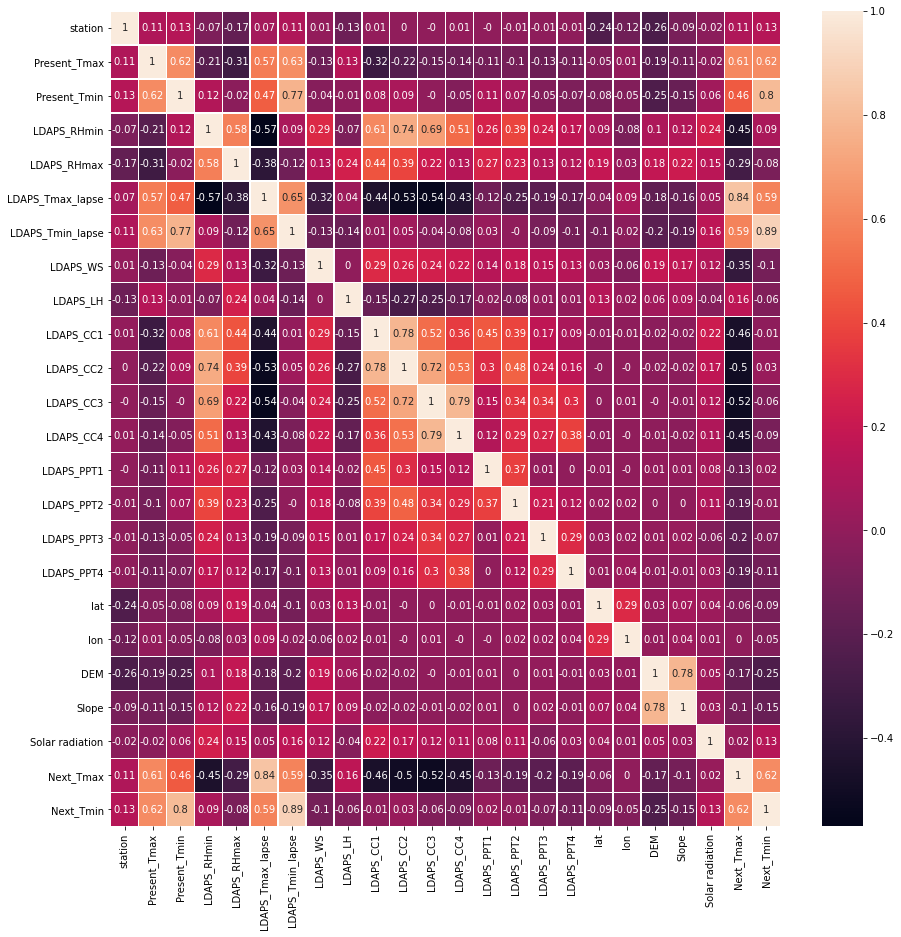

In [10]:
plt.figure(figsize=[15,15])
sns.heatmap(df.corr().round(2), linewidths=.5, annot=True)

In [11]:
# Use the upper triangle to mask the correlation matrix
df_new = df_train.copy()
df_new = df_new.drop(["Next_Tmin", "Next_Tmax"], axis=1)
upper_triangle = np.triu(np.ones(df_new.corr().shape)).astype(bool)

# Get the correlation pairs
correlation_pairs = df_new.corr().mask(upper_triangle).abs().unstack().sort_values(ascending=False)
correlation_pairs = pd.DataFrame(correlation_pairs)
print("Correlation between Features")
display(correlation_pairs.head(25))
print("="*50)

# Display the highly correlated features
highly_correlated = correlation_pairs[correlation_pairs[0]>0.75]
print("Highly Correlated Features")
display(highly_correlated)
print("="*50)

Correlation between Features


,,0
LDAPS_CC3,LDAPS_CC4,0.797411
LDAPS_CC1,LDAPS_CC2,0.785997
DEM,Slope,0.782553
Present_Tmin,LDAPS_Tmin_lapse,0.773502
LDAPS_RHmin,LDAPS_CC2,0.748874
LDAPS_CC2,LDAPS_CC3,0.722106
LDAPS_RHmin,LDAPS_CC3,0.689265
LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,0.654332
Present_Tmax,LDAPS_Tmin_lapse,0.628550
LDAPS_RHmin,LDAPS_CC1,0.622385


Highly Correlated Features


,,0
LDAPS_CC3,LDAPS_CC4,0.797411
LDAPS_CC1,LDAPS_CC2,0.785997
DEM,Slope,0.782553
Present_Tmin,LDAPS_Tmin_lapse,0.773502


In [12]:
# Remove each of the highly correlated features and check
highly_correlated.reset_index(inplace=True)
hc_features = highly_correlated["level_0"]

In [13]:
df_new.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
2798,24.0,25.3,20.3,53.098980,88.314713,28.838707,22.714764,4.491992,35.357061,0.378218,...,0.536422,0.217628,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,4849.283203
1429,5.0,30.0,21.3,57.957870,88.353050,28.629040,22.664603,5.869879,89.331824,0.123029,...,0.001589,0.000000,0.000000,0.007546,0.000000,37.5507,127.135,35.0380,0.5055,4563.660156
4835,11.0,32.6,20.7,37.920181,77.275185,33.550047,24.529717,6.451454,71.790871,0.009318,...,0.278280,0.000000,0.000000,0.000000,0.000000,37.5372,127.085,28.7000,0.6233,5795.268066
5434,10.0,30.0,24.0,66.996681,95.048515,26.293850,23.365634,4.801002,34.452793,0.808813,...,0.787790,4.833832,2.626041,0.000000,0.029888,37.4562,126.955,208.5070,5.1782,5352.822754
7260,11.0,31.3,23.2,54.651810,80.519485,28.943090,24.040451,6.525222,49.586287,0.086389,...,0.679298,0.000000,0.000000,0.000000,0.000000,37.5372,127.085,28.7000,0.6233,5102.056152


In [14]:
# Remove highly correlated features
for feature in hc_features:
    print("Removing:", feature, "...")
    df_new = df_new.drop([feature], axis=1)
    upper_triangle = np.triu(np.ones(df_new.corr().shape)).astype(bool)
    c = df_new.corr().mask(upper_triangle).abs().unstack().sort_values(ascending=False)
    c = pd.DataFrame(c)
    print(c[c[0]>0.75])
    print("="*50, "\n")
    if c[c[0]>0.75].size == 0:
        print("The number of highly  correlated fetaures has become zero!")
        print("Preventing all further removals :)")
        break

Removing: LDAPS_CC3 ...
                                      0
LDAPS_CC1    LDAPS_CC2         0.785997
DEM          Slope             0.782553
Present_Tmin LDAPS_Tmin_lapse  0.773502

Removing: LDAPS_CC1 ...
                                      0
DEM          Slope             0.782553
Present_Tmin LDAPS_Tmin_lapse  0.773502

Removing: DEM ...
                                      0
Present_Tmin LDAPS_Tmin_lapse  0.773502

Removing: Present_Tmin ...
Empty DataFrame
Columns: [0]
Index: []

The number of highly  correlated fetaures has become zero!
Preventing all further removals :)


In [15]:
display(df_new.head())
df_new.shape

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC2,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,Slope,Solar radiation
2798,24.0,25.3,53.098980,88.314713,28.838707,22.714764,4.491992,35.357061,0.397159,0.536422,0.217628,0.000000,0.000000,0.000000,37.5237,126.909,0.2223,4849.283203
1429,5.0,30.0,57.957870,88.353050,28.629040,22.664603,5.869879,89.331824,0.218586,0.001589,0.000000,0.000000,0.007546,0.000000,37.5507,127.135,0.5055,4563.660156
4835,11.0,32.6,37.920181,77.275185,33.550047,24.529717,6.451454,71.790871,0.015765,0.278280,0.000000,0.000000,0.000000,0.000000,37.5372,127.085,0.6233,5795.268066
5434,10.0,30.0,66.996681,95.048515,26.293850,23.365634,4.801002,34.452793,0.790333,0.787790,4.833832,2.626041,0.000000,0.029888,37.4562,126.955,5.1782,5352.822754
7260,11.0,31.3,54.651810,80.519485,28.943090,24.040451,6.525222,49.586287,0.356729,0.679298,0.000000,0.000000,0.000000,0.000000,37.5372,127.085,0.6233,5102.056152


(4779, 18)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variance Inflation Factor - directly correlated
X_df = df_new.copy()

vif = pd.DataFrame()
vif["Features"] = X_df.columns
vif["VIF Factor"]=[variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
vif.sort_values(by=["VIF Factor"], ascending=False, inplace=True)

max_col = vif[vif["VIF Factor"]>1000]
for feature in max_col["Features"]:
    max_col = vif[vif["VIF Factor"]>1000]
    print("Features with high VIF:")
    print(max_col)
    print("Dropping", feature, "...")
    X_df.drop([feature], axis=1, inplace=True)

    vif = pd.DataFrame()
    vif["Features"] = X_df.columns
    vif["VIF Factor"]=[variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    vif.sort_values(by=["VIF Factor"], ascending=False, inplace=True)

    if vif[vif["VIF Factor"]>1000].size==0:
        print("The number of fetaures that have high VIF has become zero!")
        print("Preventing all further removals :)")
        break

Features with high VIF:
   Features     VIF Factor
14      lat  644229.004142
15      lon  641558.462460
Dropping lat ...
The number of fetaures that have high VIF has become zero!
Preventing all further removals :)


In [17]:
df_new = X_df
display(df_new.head())
df_new.shape

,station,Present_Tmax,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC2,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lon,Slope,Solar radiation
2798,24.0,25.3,53.098980,88.314713,28.838707,22.714764,4.491992,35.357061,0.397159,0.536422,0.217628,0.000000,0.000000,0.000000,126.909,0.2223,4849.283203
1429,5.0,30.0,57.957870,88.353050,28.629040,22.664603,5.869879,89.331824,0.218586,0.001589,0.000000,0.000000,0.007546,0.000000,127.135,0.5055,4563.660156
4835,11.0,32.6,37.920181,77.275185,33.550047,24.529717,6.451454,71.790871,0.015765,0.278280,0.000000,0.000000,0.000000,0.000000,127.085,0.6233,5795.268066
5434,10.0,30.0,66.996681,95.048515,26.293850,23.365634,4.801002,34.452793,0.790333,0.787790,4.833832,2.626041,0.000000,0.029888,126.955,5.1782,5352.822754
7260,11.0,31.3,54.651810,80.519485,28.943090,24.040451,6.525222,49.586287,0.356729,0.679298,0.000000,0.000000,0.000000,0.000000,127.085,0.6233,5102.056152


(4779, 17)

In [24]:
df_save = df_new.copy()
feature_columns = df_save.columns

df_save["Next_Tmin"] = df_train["Next_Tmin"]
df_save["Next_Tmax"] = df_train["Next_Tmax"]
df_save.to_csv("../datasets/train_processed.csv")

df_val_save = df_val[feature_columns]
df_val_save["Next_Tmin"] = df_val["Next_Tmin"]
df_val_save["Next_Tmax"] = df_val["Next_Tmax"]
df_val_save.to_csv("../datasets/val_processed.csv")

df_test_save = df_test[feature_columns]
df_test_save["Next_Tmin"] = df_test["Next_Tmin"]
df_test_save["Next_Tmax"] = df_test["Next_Tmax"]
df_test_save.to_csv("../datasets/test_processed.csv")

<ipython-input-24-bc2e9e28daac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_save["Next_Tmin"] = df_val["Next_Tmin"]
<ipython-input-24-bc2e9e28daac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val_save["Next_Tmax"] = df_val["Next_Tmax"]
<ipython-input-24-bc2e9e28daac>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

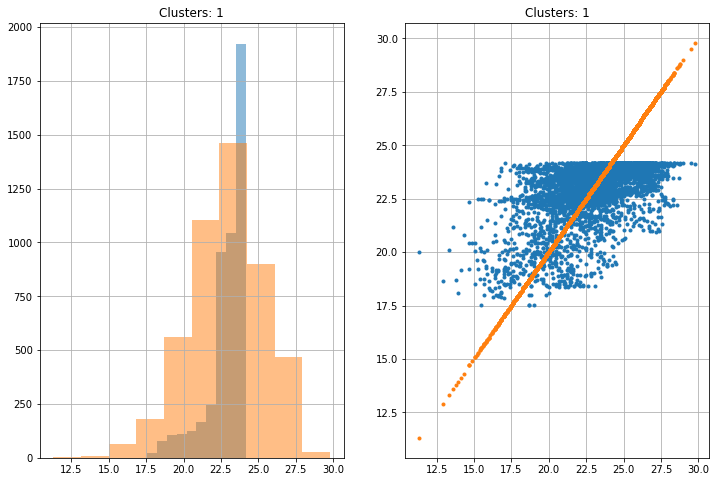

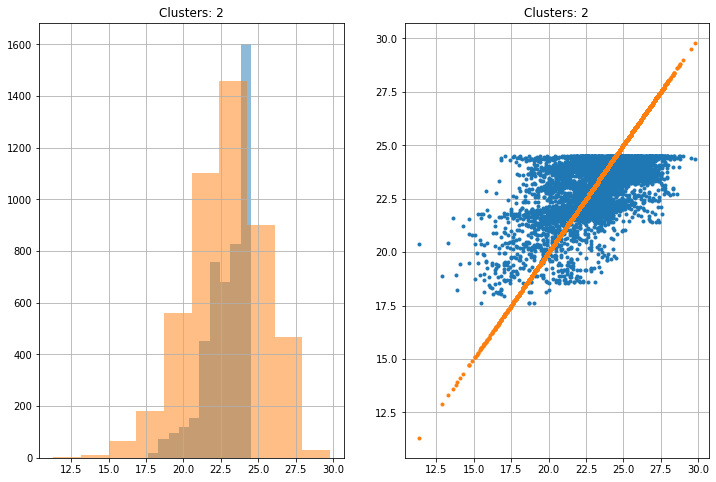

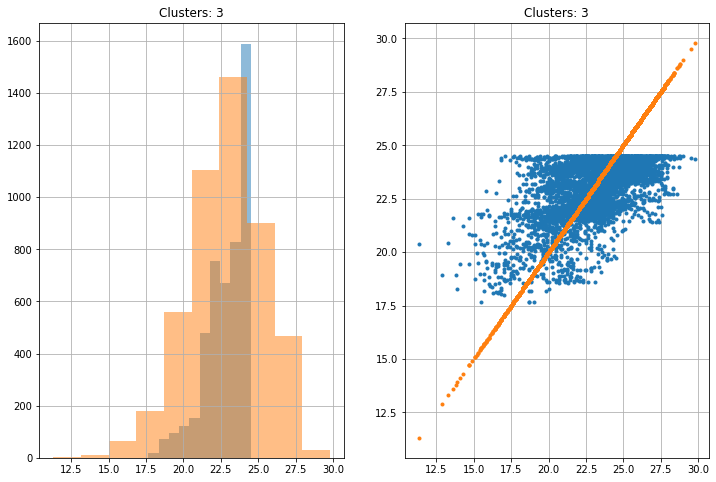

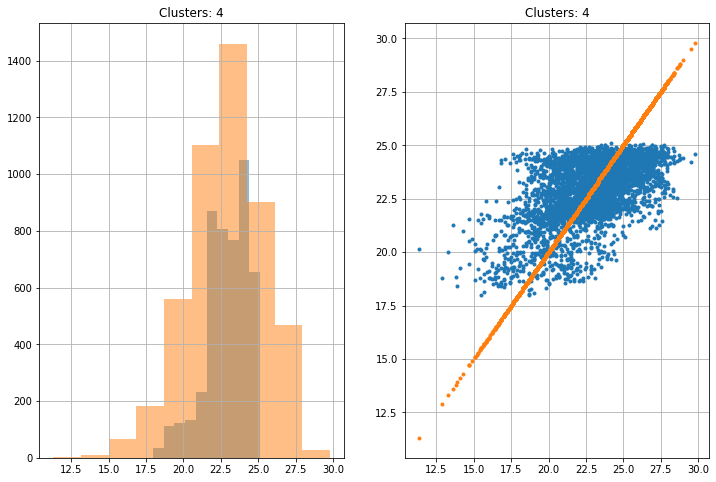

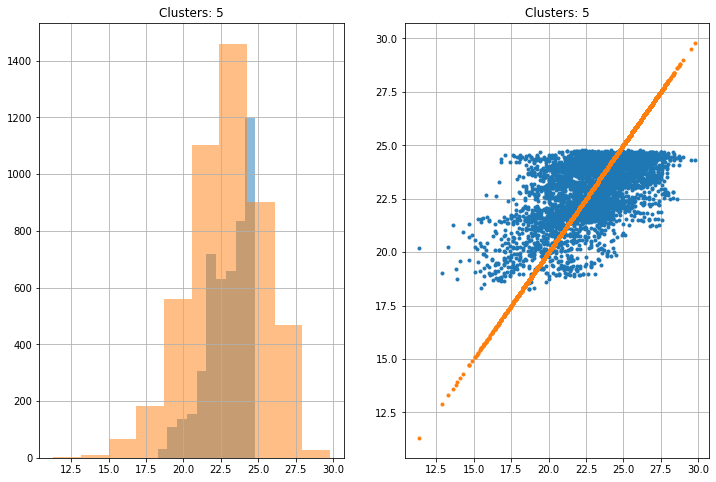

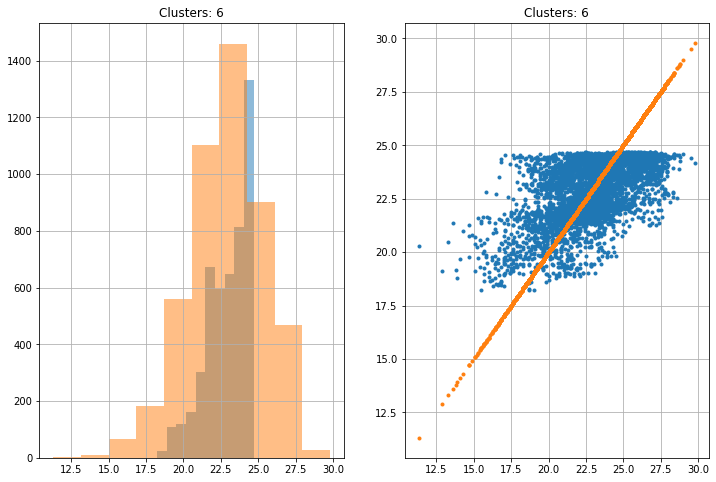

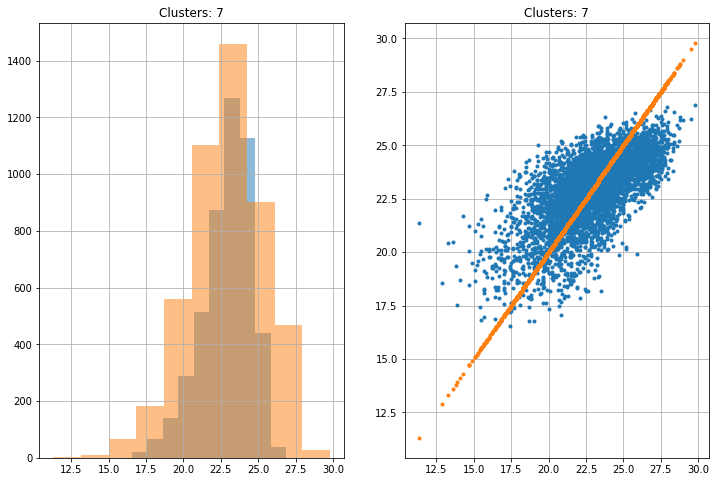

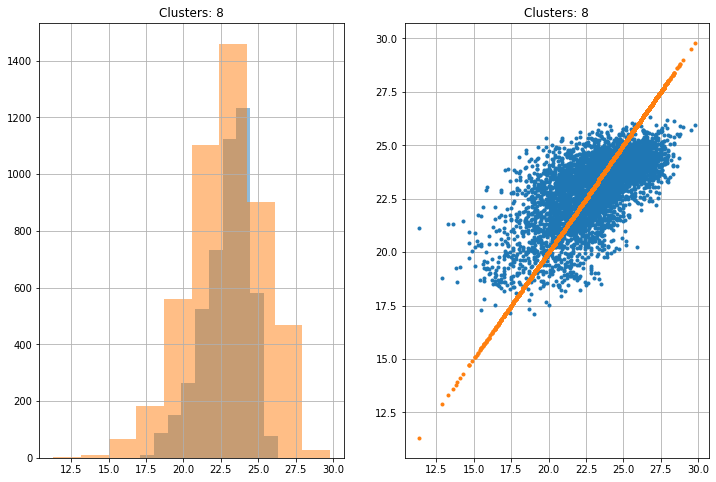

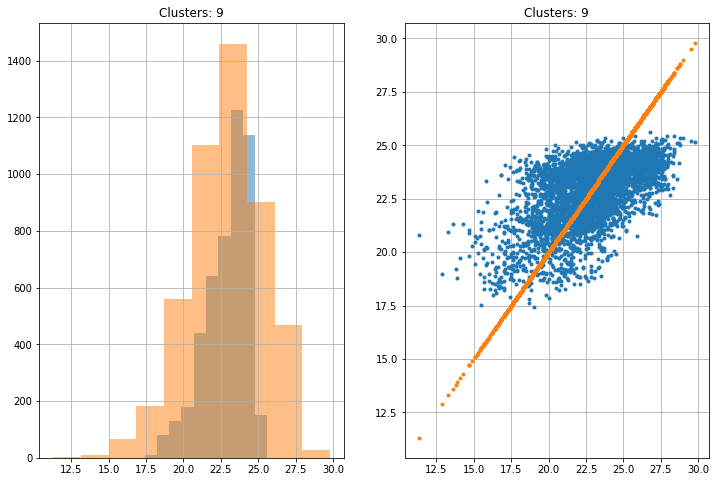

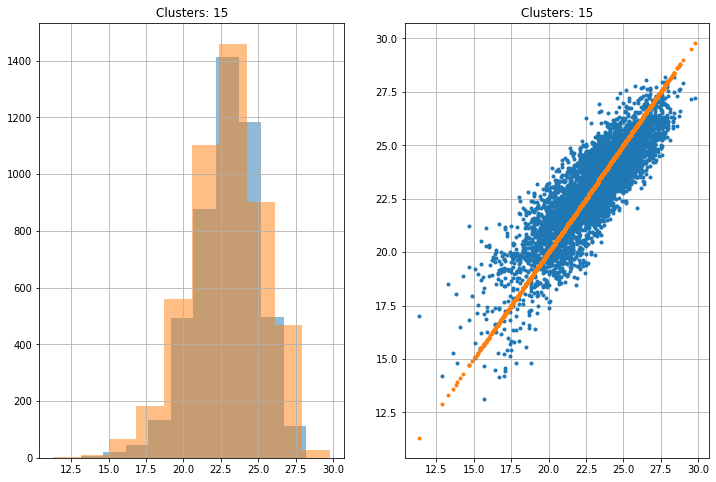

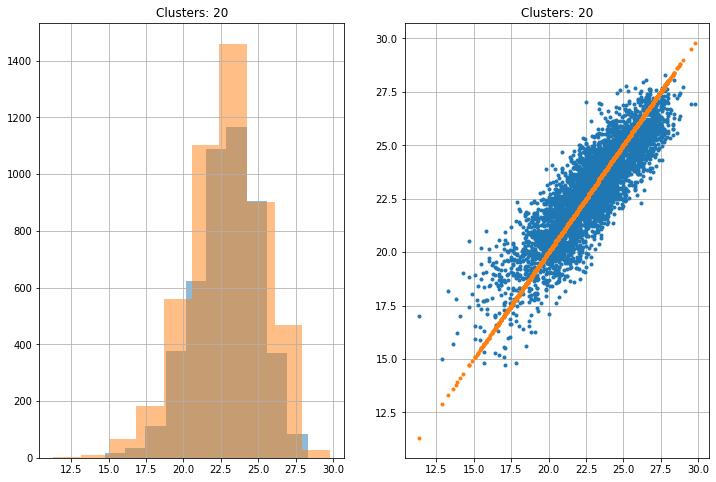

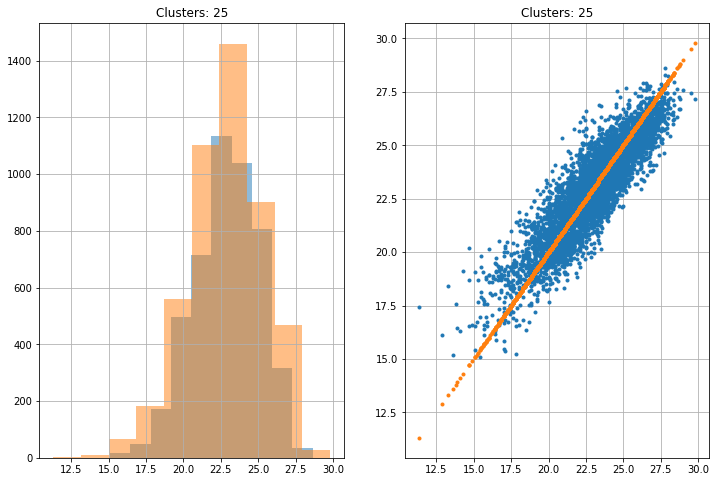

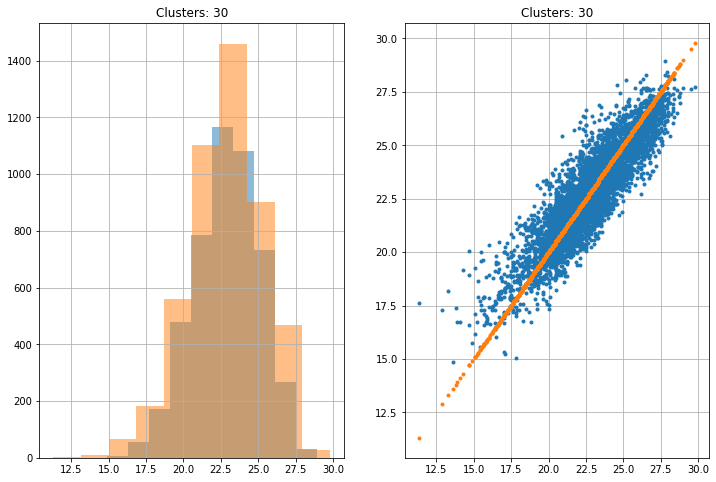

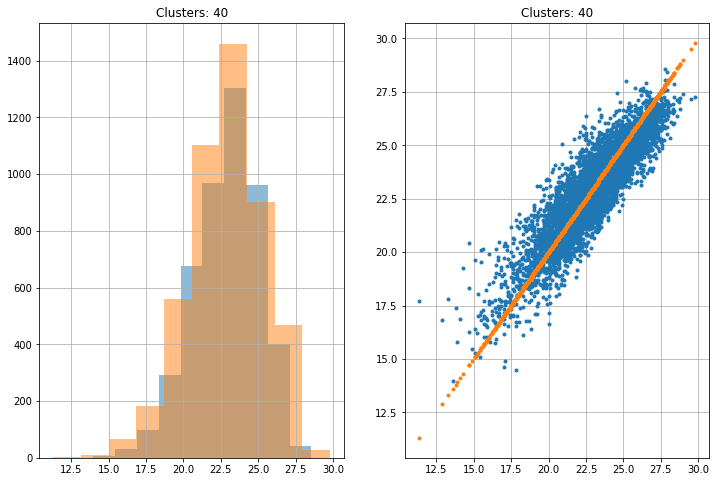

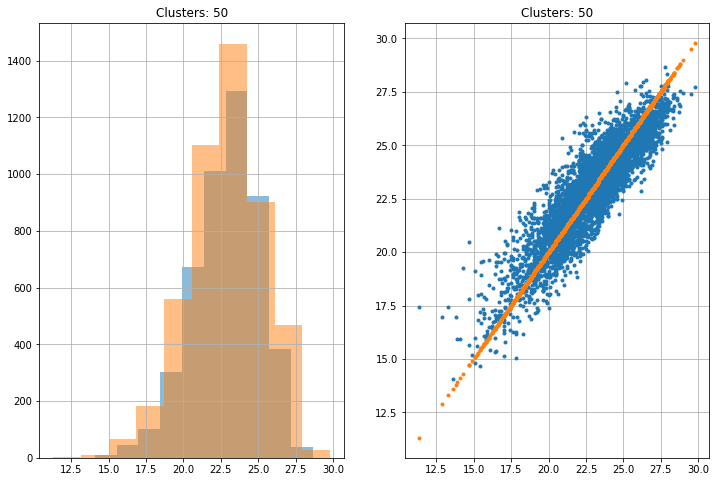

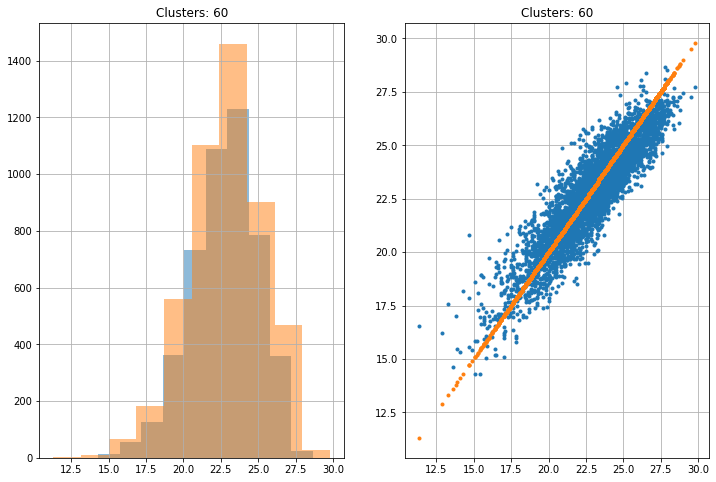

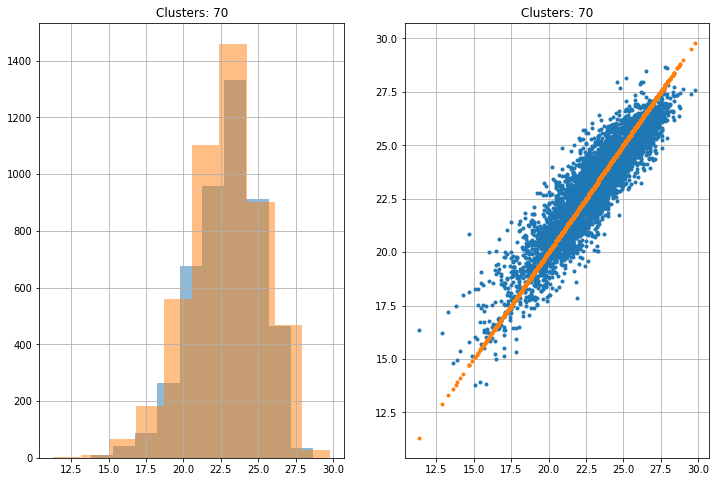

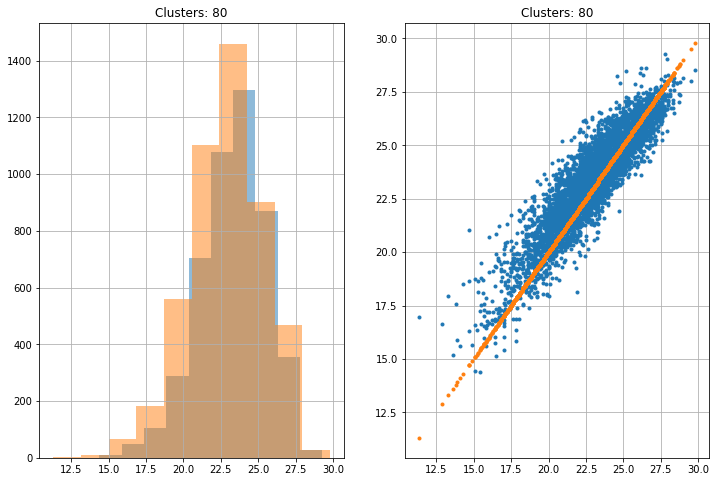

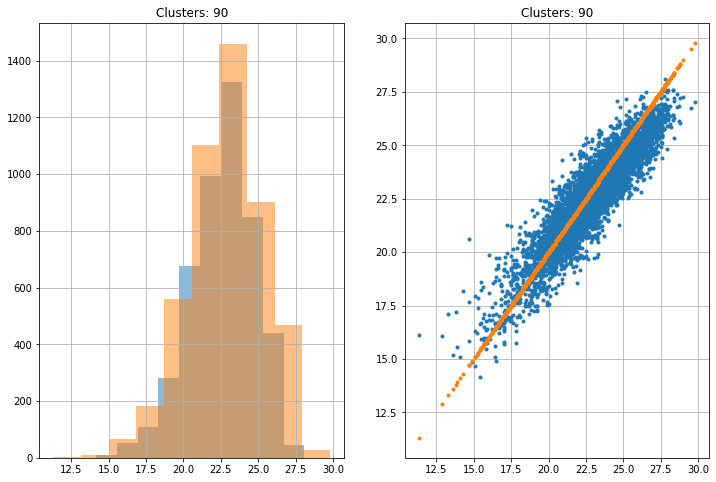

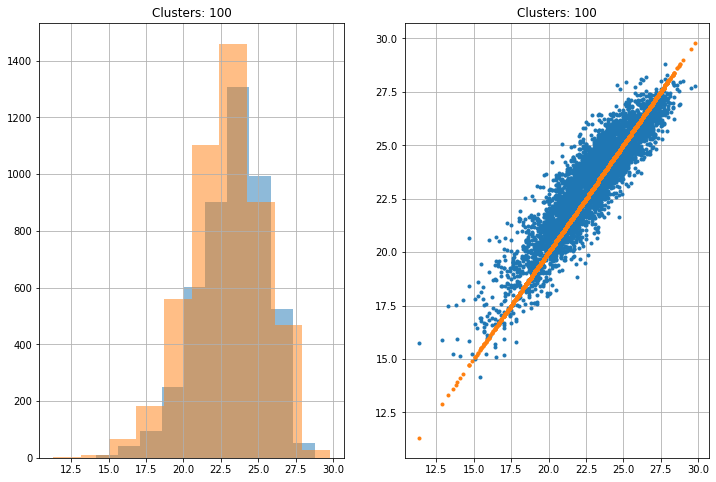

In [25]:
from sklearn.cluster import KMeans

num_clusters = [1]
num_clusters.extend(range(2,10))
num_clusters.extend(range(15, 31, 5))
num_clusters.extend(range(40, 101, 10))

sse_list = []
label_list = []
cluster_centers_list = []
error_list = []
val_error_list = []

for n_clu in num_clusters:
    kmeans = KMeans(n_clusters=n_clu, random_state=42).fit(df_new.to_numpy())
    sse_list.append(kmeans.inertia_)
    label_list.append(kmeans.labels_)
    cluster_centers_list.append(kmeans.cluster_centers_)  

    mean_centers = cluster_centers_list[-1]
    corresponding_center = mean_centers[label_list[-1],:]

    X = df_new.to_numpy()
    X_val = df_val_new.to_numpy()
    val_labels = kmeans.predict(X_val)
    
    distance = np.linalg.norm(X-corresponding_center, axis=1)
    var = np.var(distance)*distance.size

    phi = np.ones((X.shape[0], 1))
    phi_val = np.ones((X_val.shape[0], 1))
    
    for i in range(n_clu):
        A = X-mean_centers[i,:]
        A = np.exp(-np.linalg.norm(X-mean_centers[i,:], axis=1)**2/var)
        
        B = X_val-mean_centers[i,:]
        B = np.exp(-np.linalg.norm(X_val-mean_centers[i,:], axis=1)**2/var)
        
        phi = np.append(phi, np.exp(-np.linalg.norm(X-mean_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)
        phi_val = np.append(phi_val, np.exp(-np.linalg.norm(X_val-mean_centers[i,:], axis=1)**2/var).reshape(-1,1), axis=1)

    lmbda = 0
    W1 = (np.linalg.inv(phi.T @ phi + lmbda*np.identity(phi.shape[1])) @ phi.T) @ df_save["Next_Tmin"]
    W1 = W1.reshape(-1,1)
    pred = phi @ W1
    val_pred = phi_val @ W1

    plt.figure(figsize=[12,8])
    plt.title("Clusters: "+str(n_clu))
    plt.subplot(1, 2, 1)
    plt.hist(pred, alpha=0.5)
    plt.hist(df_save["Next_Tmin"], alpha=0.5)
    plt.title("Clusters: "+str(n_clu))
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(df_save["Next_Tmin"], pred, ".")
    plt.plot(df_save["Next_Tmin"], df_save["Next_Tmin"], '.')
    plt.title("Clusters: "+str(n_clu))
    plt.grid()
    plt.show()

    error = np.linalg.norm(df_save["Next_Tmin"].to_numpy().reshape(-1,1)-pred)
    error_list.append(error)
    
    val_error = np.linalg.norm(df_val_save["Next_Tmin"].to_numpy().reshape(-1,1)-val_pred)
    val_error_list.append(val_error)

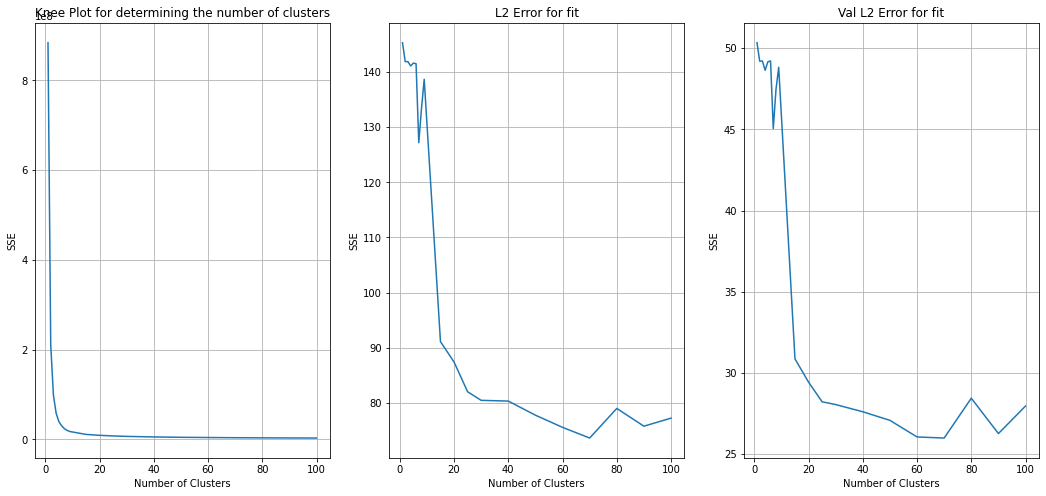

In [26]:
plt.figure(figsize=[18,8])
plt.subplot(1,3,1)
plt.plot(num_clusters, sse_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Knee Plot for determining the number of clusters")
plt.grid()
plt.subplot(1,3,2)
plt.plot(num_clusters, error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title(("L2 Error for fit"))
plt.grid()
plt.subplot(1,3,3)
plt.plot(num_clusters, val_error_list)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title(("Val L2 Error for fit"))
plt.grid()
plt.show()
plt.show()

In [27]:
error_list = np.array(error_list)
df_error = pd.DataFrame({"Clusters":num_clusters, "Error":error_list})
df_error.sort_values(by=["Error"], ascending=True, inplace=True)
display(df_error)

,Clusters,Error
16,70,73.608460
15,60,75.545177
18,90,75.756090
19,100,77.221378
14,50,77.752814
17,80,78.975920
13,40,80.313327
12,30,80.445031
11,25,82.005356
10,20,87.401448


In [28]:
val_error_list = np.array(val_error_list)
df_error = pd.DataFrame({"Clusters":num_clusters, "Error":val_error_list})
df_error.sort_values(by=["Error"], ascending=True, inplace=True)
display(df_error)

,Clusters,Error
16,70,25.986017
15,60,26.052353
18,90,26.261381
14,50,27.075397
13,40,27.603756
19,100,27.957907
12,30,28.048353
11,25,28.219289
17,80,28.439642
10,20,29.431057
